### Which metric is important to your client? 
- Recall over Precision: if our model misclassifies some observations it's not harmful to people or the business. It would be better to cast the net wider and provide interventions to more potential churn customers than to pull back and miss potential churn customers. The business investment is in creative development of interventions - so if some people that are misclassified get these interventions it shouldn't incur huge costs. The creative guideline would be not to call out people directly. 
- Accuracy: Don't think that data falls into the this scenario: When one class is significantly less common that the other accuracy is often not the most helpful metric to optimize.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ipywidgets import interactive, FloatSlider

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jennihawk/Documents/Data Science/Classification/Churn Project/Models/chatr_clean.csv')

In [3]:
data.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber,InternetService_No,Contract_One_Year,Contract_Two_year,PaymentMethod_Crcard,...,DeviceProtection_No_internet_serv,DeviceProtection_Yes,TechSupport_No_internet_serv,TechSupport_Yes,StreamingTV_No_internet_serv,StreamingTV_Yes,StreamingMovies_No_internet_serv,StreamingMovies_Yes,PaperlessBilling_Yes,Churn_Yes
0,7590-VHVEG,0,1.0,29.85,29.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5575-GNVDE,0,34.0,56.95,1889.50,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2.0,53.85,108.15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,7795-CFOCW,0,45.0,42.30,1840.75,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
4,9237-HQITU,0,2.0,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
data.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

### Sklearn defaults to keep in mind
- Decision Boundary: 50% cutoff value for positive / negative class
- Regularization built in
- Hyperparameter C controls effect of model term. Default C=1.0
- Set C through validation or cross-validation. Larger C allows model to be more complex.
- It's just like the alpha parameter from linear regression regularization, except it multiplies the model term instead of the regularization term. 
- the regularization term can be the squares of the coefficient betas, like ridge regression, - or it could be the absolute values of those betas, like lasso.
- Option to set penalty. Penalty refers to type of regularization penalty:
- L2 default means we're squaring the coefficients
- L1 set for absolute values. You can also set to elastic net penalty. Or completely turn off regularization. 

In [5]:
features_in = ['SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber', 'InternetService_No',
       'Contract_One_Year', 'Contract_Two_year', 'PaymentMethod_Crcard',
       'PaymentMethod_Electr_Check', 'PaymentMethod_Mailed_check',
       'MultipleLines_No_phone_serv', 'MultipleLines_Yes', 'Dependents_Yes',
       'gender_Male', 'Partner_Yes', 'PhoneService_Yes',
       'OnlineSecurity_No_internet_serv', 'OnlineSecurity_Yes',
       'OnlineBackup_No_Internet_Serv', 'OnlineBackup_Yes',
       'DeviceProtection_No_internet_serv', 'DeviceProtection_Yes',
       'TechSupport_No_internet_serv', 'TechSupport_Yes',
       'StreamingTV_No_internet_serv', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_serv', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes']

y = data['Churn_Yes']
X = data[features_in]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

pipe = Pipeline([('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

In [6]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [7]:
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('scaler', StandardScaler()), ('LogReg', LogisticRegression())])

### Metrics

#### Average Rate of Churn on Test Data
- See if you have class imbalance
- Since I don't have 50% average churn - there's a class imbalance

In [8]:
np.mean(y_test)

0.2605233219567691

### Class Imbalance
- Target classes churn and not churn. What's the ratio. How well balanced is target class. Is there a little bit of churn and a lot of people sticking with it. 
- In your case you would compare the percent of your data points with churn == True vs churn == False
- Code example to determine which features have imbalance:
https://elitedatascience.com/imbalanced-classes
https://stackoverflow.com/questions/67287472/how-can-i-find-whether-my-dataset-is-balanced-or-not

#### Hard Class Predictions
Predict Churn / Not Churn

In [9]:
y_pred = pipe.predict(X_test)

In [10]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

#### Soft Class Predictions
If class labels strings Sklearn displays in alphabetical order. If numerical class labels they'll be in ascending order

In [11]:
pipe.predict_proba(X_test)[:5]

array([[0.99479267, 0.00520733],
       [0.8773139 , 0.1226861 ],
       [0.30829241, 0.69170759],
       [0.88565903, 0.11434097],
       [0.63613899, 0.36386101]])

#### Accuracy
Percentage of observations that were correctly classified.
When one class is significantly less common that the other accuracy is often not the most helpful metric to optimize.

In [12]:
#accuracy score on train data
pipe.score(X_train, y_train)

0.8065984072810012

In [13]:
#accuracy score on test data
pipe.score(X_test, y_test)

0.7895335608646189

#### Confusion Matrix

In [14]:
#sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

Get this to print out percentage option too

In [15]:
logreg_confusion = confusion_matrix(y_test, y_pred)

In [16]:
logreg_confusion

array([[1151,  149],
       [ 221,  237]])

In [17]:
def make_confusion_matrix(model, threshold = 0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    churn_conf = confusion_matrix(y_test, y_pred)
    plt.figure(dpi=80)
    sns.heatmap(churn_conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',);
#     plt.xlabel('prediction')
#     plt.ylabel('actual')

In [18]:
# confusion matrix with threshold slider
interactive(lambda threshold: make_confusion_matrix(pipe, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [19]:
def make_confusion_matrix(model, threshold = 0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    churn_conf = confusion_matrix(y_test, y_pred, normalize = 'all')
    plt.figure(dpi=80)
    sns.heatmap(churn_conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='.2%');

trouble shooting why the slider isn't working
As for why the slider does not change your confusion_matrix, I would start debugging that by investigating what pipe outputs. For example does pipe give hard classes or soft probabilities and if they are probabilities are they mostly extreme (close to 0 or 1) or spread out

In [20]:
# confusion matrix with threshold slider
# how the widget works https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html?highlight=interact
interactive(lambda threshold: make_confusion_matrix(pipe, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

Confusion matrix findings
The model:
- correctly classified 1151 people who didn't cancel their subscription. 
- correctly classified 237 customers as people who were going to cancel their subscription and did.
- incorrectly classified  149 customers as people who were going to cancel their subscription when they actually kept their subscription. 
- It incorrectly classified 221 customers as people who were going to keep their subscription but actually canceled it. 

### Precision, Recall, F1 Scores
- Precision goes down as you decrease the threshold, while recall goes up. This is called the _precision-recall tradeoff_.
- Precision = actual customers churned divided by the number of customers churned as classifed by the model. (100% precision indicates that all of the positives identified by our model were actual positives.) 
- Recall = churned customers correctly classified divided by the actual churned customers in the dataset.
- F1 = the harmonic mean of precision and recall. It's designed to penalize situations where precision or recall is significantly better than the other metric. 

In [21]:
print("Default treshold:")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Default treshold:
Precision: 0.6139896373056994
Recall: 0.517467248908297
F1: 0.5616113744075829


### ROC Curve
- ROC AUC (area under curve) metric is 1 for a perfect classifier, and it's equal to 0.5 for a model that performs as well as random guess. 

How the variables below are working
- the variables (fpr, tpr, thresholds) are returned by the roc_curve function are stored in these three variables - fpr (false positive rate), tpr (true positive rate) and thresholds. Fpr and tpr are used later to plot the chart.

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.predict_proba(X_test)[:,1])

ROC AUC score =  0.8344776620759153


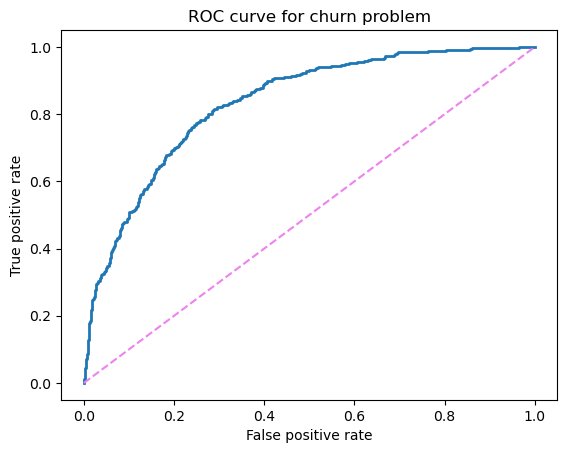

In [23]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for churn problem');
print("ROC AUC score = ", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

### Interpreting Coefficients: Would like to indicate which features are more strongly associated with churn - we do this with coefficients, correct?
- One unit of increase in x actually increases the log odds by beta units. 
- In other words: One unit of increase in x, increases the odds by an exponential factor of beta.
- If the features coefficient beta is positive, increasing that feature makes the positive class more likely
- If beta is negative, increasing the feature does the opposite and the positive class becomes less likely

In [24]:
pipe['LogReg'].coef_

array([[ 0.09012489, -1.50264731, -0.4777315 ,  0.74665475,  0.60012412,
        -0.06625235, -0.31859564, -0.5827506 , -0.05227625,  0.12311827,
        -0.03341831,  0.042894  ,  0.13116692, -0.11064195, -0.01522435,
         0.04703812, -0.042894  , -0.06625235, -0.16001929, -0.06625235,
        -0.02570216, -0.06625235,  0.03896628, -0.06625235, -0.13808225,
        -0.06625235,  0.17345693, -0.06625235,  0.19577975,  0.11482629]])

In [25]:
np.exp(pipe['LogReg'].coef_)

array([[1.09431095, 0.22254025, 0.6201887 , 2.10992996, 1.82234497,
        0.93589467, 0.72716953, 0.55836043, 0.94906665, 1.13101818,
        0.96713392, 1.04382724, 1.14015808, 0.89525924, 0.98489096,
        1.04816197, 0.95801294, 0.93589467, 0.85212735, 0.93589467,
        0.97462533, 0.93589467, 1.03973543, 0.93589467, 0.87102705,
        0.93589467, 1.18940946, 0.93589467, 1.21625899, 1.12167857]])